In [21]:
import numpy as np
import pandas as pd
import os
#print(os.listdir("dekstop"))
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

customers = pd.read_csv(r"C:\Users\Lenovo\Desktop\Ecommerce Customers.csv")
#print(customers.head())
#print(customers.describe())
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB
None


In [24]:
#sns.set_palette("GnBu_d")
#sns.set_style('whitegrid')

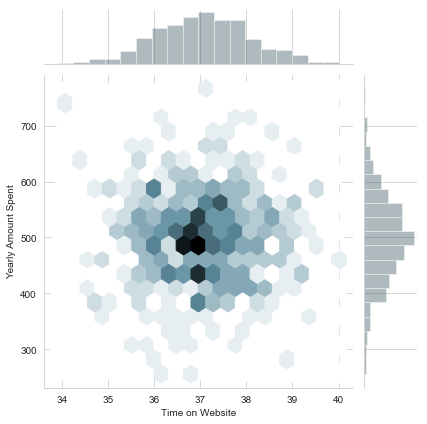

In [31]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',kind="hex",data=customers)

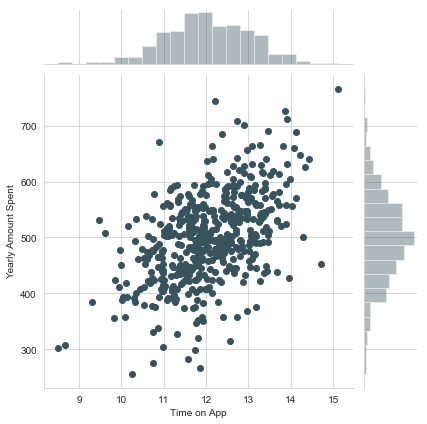

In [38]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

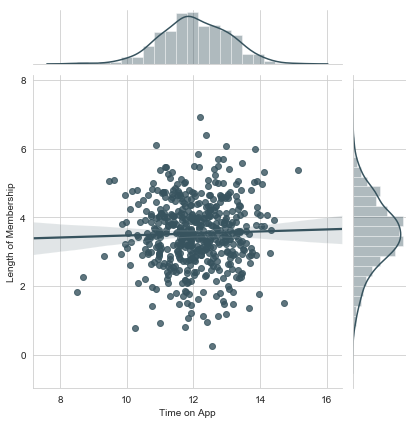

In [37]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='reg',data=customers)

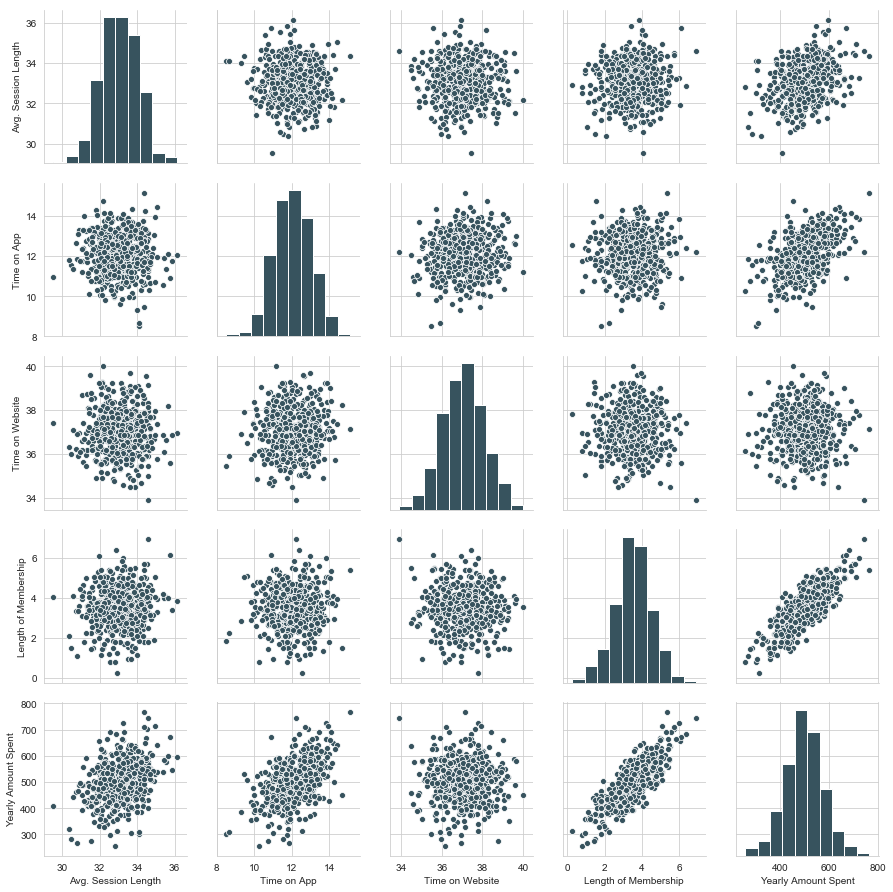

In [44]:
#now watch magic
#actually every thing above was just "time pass"
sns.pairplot(customers)

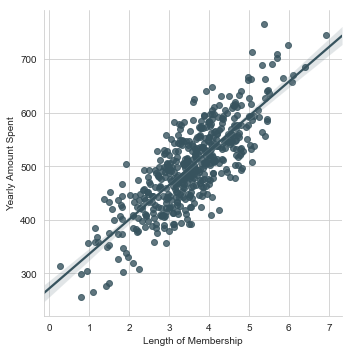

In [47]:
#so we can see length of membership and yearly amount spent
#are most correlated
#so we will again create a graph between those two parameters
#beacuse we love doing that
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)


In [48]:
#now lets split the data
X = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]


In [52]:
y = customers['Yearly Amount Spent']

In [50]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=101)
#so random_state when assigned some value will no longer be random
#and here 101 is the speed with which it will produce random no.
#its good to set a value if we want same output again and again but
#in real case scenaio its  good to not ser a value to it


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
#creating a instance of a LinearRegression() model
lm = LinearRegression()

In [56]:
#train/fit lm on training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
#print out the coefficients of the model
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [58]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

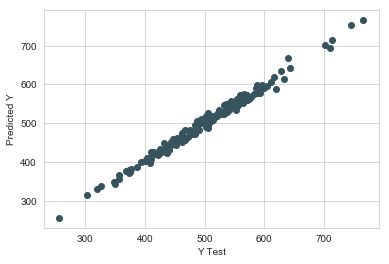

In [59]:
#creating a scatterplot of the real test values versus the prediction values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [61]:
from sklearn import metrics

In [63]:
#lets evaluate our model by residual sum of squares 
#and the explained variance score(R^2)

print('MAE :'," ",metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ",metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))


MAE :   7.228148653430853
MSE :   79.81305165097487
RMAE :   8.933815066978656


C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


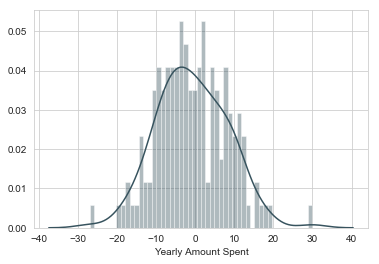

In [67]:
#plot a histogram of the residuals and make sure it looks normally distributed
sns.distplot(y_test - predictions,bins=50)

In [68]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
